In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install nlp
!pip install alibi-detect
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 6.1 MB/s 
     |████████████████████████████████| 212 kB 39.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 306 kB 7.1 MB/s 
     |████████████████████████████████| 4.7 MB 59.9 MB/s 
     |████████████████████████████████| 3.3 MB 52.2 MB/s 
     |████████████████████████████████| 34.5 MB 59.2 MB/s 
     |████████████████████████████████| 6.6 MB 44.7 MB/s 
     |████████████████████████████████| 101 kB 13.3 MB/s 
     |████████████████████████████████| 596 kB 72.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.39.0
    Uninstalling llvmlite-0.39.0:
      Successful

In [3]:
import numpy as np
import pandas as pd

# Import package related files

In [4]:
!pip install -r /content/gdrive/MyDrive/DFCI/TestingPackage/NaturallyDrifted/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import sys
sys.path.insert(0,'/content/gdrive/My Drive/DFCI/TestingPackage/NaturallyDrifted/alibiDetectors') # very important

In [6]:
from fileImports import imports 
samplingData, basicDetectors, onlineDetectors, contextDetectors, alibiDetectors = imports.run()

# Data 1: COVID Tweets

In [18]:
!unzip gdrive/My\ Drive/Corona_NLP2.zip

Archive:  gdrive/My Drive/Corona_NLP2.zip
  inflating: Covid-19 Twitter Dataset (Apr-Jun 2020).csv  
  inflating: Covid-19 Twitter Dataset (Aug-Sep 2020).csv  


In [19]:
features = ['created_at', 'original_text', 'sentiment']
data1 = pd.read_csv("Covid-19 Twitter Dataset (Apr-Jun 2020).csv", encoding = 'ISO-8859-1')[features]
data2 = pd.read_csv("Covid-19 Twitter Dataset (Aug-Sep 2020).csv", encoding = 'ISO-8859-1')[features]

data1 = data1[data1['sentiment'] != 'neu']
data2 = data2[data2['sentiment'] != 'neu']

data1['sentiment'] = data1['sentiment'].replace('pos', 1)
data1['sentiment'] = data1['sentiment'].replace('neg', 0)


data2['sentiment'] = data2['sentiment'].replace('pos', 1)
data2['sentiment'] = data2['sentiment'].replace('neg', 0)

data1 = np.array(data1)
X1 = np.array([i[1] for i in data1])

data2 = np.array(data2)
X2 = np.array([i[1] for i in data2])

print("X1 length:", len(X1))
print("X2 length:", len(X2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


X1 length: 147892
X2 length: 191581


In [9]:
# data sampling related parameters
sample_size = 200

# embedding related parameters
SBERT_model = 'bert-base-uncased'

# drift detection general parameters
test = "MMD"
drift_type = "Sudden"
windows = None

# alibi's generic detector parameters 
emb_type = 'hidden_state'
n_layers = 8
max_len = 100
enc_dim = 32 # for uae
tokenizer_size = 3
batch_size = 32

detector = alibiDetectors(data_ref = X1, data_h0 = X1, data_h1 = X2, sample_size = sample_size,
                    SBERT_model = SBERT_model,
                    test = test,  drift_type = drift_type,  plot = True,                                 
                    emb_type = emb_type, n_layers = n_layers, max_len = max_len,
                    enc_dim = enc_dim, tokenizer_size = tokenizer_size, batch_size = batch_size)
detector.run()

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. 

Drift results for  X_h0 data using  MMD test:
Drift? No!
p-value: 0.24
Drift results for  X_comp data using  MMD test:
Drift? Yes!
p-value: 0.01


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. 

Drift results for window:  1 data using MMD test:
Drift? Yes!
p-value: 0.0
Drift results for window:  2 data using MMD test:
Drift? No!
p-value: 0.17
Drift results for window:  3 data using MMD test:
Drift? No!
p-value: 0.27
Drift results for window:  4 data using MMD test:
Drift? Yes!
p-value: 0.03
Drift results for window:  5 data using MMD test:
Drift? Yes!
p-value: 0.0
Drift results for window:  6 data using MMD test:
Drift? No!
p-value: 0.08


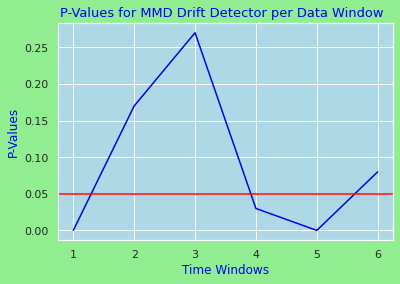

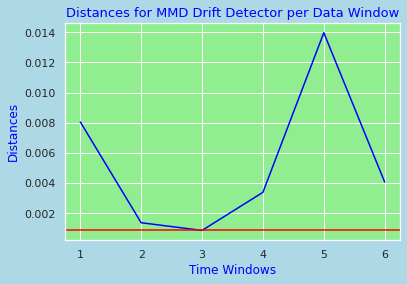

In [20]:
drift_type = "Gradual"
windows = 7

detector = alibiDetectors(data_ref = X1, data_h0 = X1, data_h1 = X2, sample_size = sample_size, windows = windows,
                    SBERT_model = SBERT_model,
                    test = test,  drift_type = drift_type,  plot = True,                                 
                    emb_type = emb_type, n_layers = n_layers, max_len = max_len,
                    enc_dim = enc_dim, tokenizer_size = tokenizer_size, batch_size = batch_size)
detector.run()

# Data 2: Vaccine Tweets

In [7]:
!unzip gdrive/My\ Drive/covidvaccines.zip

Archive:  gdrive/My Drive/covidvaccines.zip
  inflating: vaccination_all_tweets.csv  
  inflating: __MACOSX/._vaccination_all_tweets.csv  


In [8]:
data = pd.read_csv("vaccination_all_tweets.csv")
X1 = np.array(data[:len(data)//5]['text'])
X2 = np.array(data[len(data)//5:]['text'])

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. 

Drift results for window:  1 data using MMD test:
Drift? No!
p-value: 0.16
Drift results for window:  2 data using MMD test:
Drift? Yes!
p-value: 0.04
Drift results for window:  3 data using MMD test:
Drift? No!
p-value: 0.08
Drift results for window:  4 data using MMD test:
Drift? Yes!
p-value: 0.0
Drift results for window:  5 data using MMD test:
Drift? Yes!
p-value: 0.0
Drift results for window:  6 data using MMD test:
Drift? Yes!
p-value: 0.0


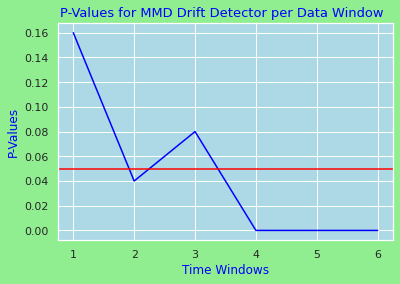

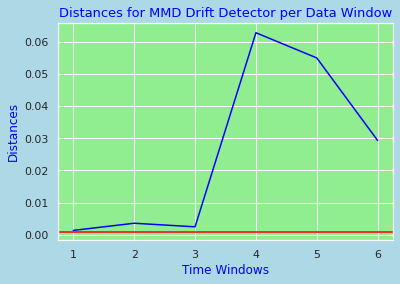

In [11]:
drift_type = "Gradual"
windows = 7

detector = alibiDetectors(data_ref = X1, data_h0 = X1, data_h1 = X2, sample_size = sample_size, windows = windows,
                    SBERT_model = SBERT_model,
                    test = test,  drift_type = drift_type,  plot = True,                                 
                    emb_type = emb_type, n_layers = n_layers, max_len = max_len,
                    enc_dim = enc_dim, tokenizer_size = tokenizer_size, batch_size = batch_size)
detector.run()

# Data 3: Drug Reviews

In [14]:
!unzip gdrive/My\ Drive/DrugReviews.zip

Archive:  gdrive/My Drive/DrugReviews.zip
   creating: DrugReviews/
  inflating: __MACOSX/._DrugReviews  
  inflating: DrugReviews/UCIdrug_train.csv  
  inflating: __MACOSX/DrugReviews/._UCIdrug_train.csv  
  inflating: DrugReviews/UCIdrug_test.csv  
  inflating: __MACOSX/DrugReviews/._UCIdrug_test.csv  


In [15]:
features = ['condition','review']
data1 = (pd.read_csv("DrugReviews/UCIdrug_train.csv", encoding = 'ISO-8859-1'))[features]
data2 = (pd.read_csv("DrugReviews/UCIdrug_test.csv", encoding = 'ISO-8859-1'))[features]

reviews_train = np.array(data1)
X1 = np.array([i[1] for i in reviews_train])
y1 = np.array([i[0] for i in reviews_train])

reviews_test = np.array(data2)
X2 = np.array([i[1] for i in reviews_test])
y2 = np.array([i[0] for i in reviews_test])

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. 

Drift results for window:  1 data using MMD test:
Drift? No!
p-value: 0.61
Drift results for window:  2 data using MMD test:
Drift? No!
p-value: 0.23
Drift results for window:  3 data using MMD test:
Drift? No!
p-value: 0.83
Drift results for window:  4 data using MMD test:
Drift? No!
p-value: 0.7
Drift results for window:  5 data using MMD test:
Drift? No!
p-value: 0.21
Drift results for window:  6 data using MMD test:
Drift? No!
p-value: 0.92
Drift results for window:  7 data using MMD test:
Drift? No!
p-value: 0.45
Drift results for window:  8 data using MMD test:
Drift? No!
p-value: 0.83
Drift results for window:  9 data using MMD test:
Drift? No!
p-value: 0.62


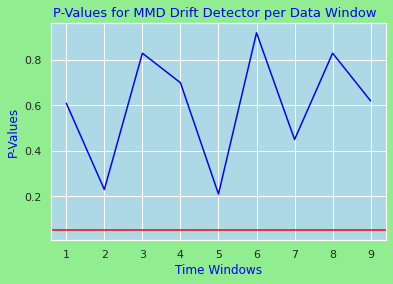

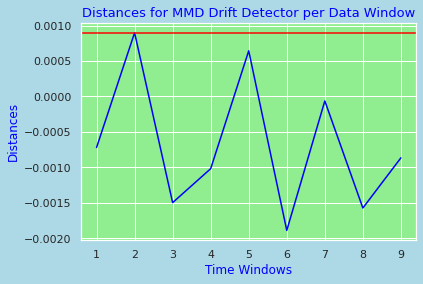

In [16]:
windows = 10

detector = alibiDetectors(data_ref = X1, data_h0 = X1, data_h1 = X2, sample_size = sample_size, windows = windows,
                    SBERT_model = SBERT_model,
                    test = test,  drift_type = drift_type,  plot = True,                                 
                    emb_type = emb_type, n_layers = n_layers, max_len = max_len,
                    enc_dim = enc_dim, tokenizer_size = tokenizer_size, batch_size = batch_size)

detector.run()

# Data 4: Medical Text

In [ ]:
!unzip gdrive/My\ Drive/MedicalText.zip

In [ ]:
data1 = np.genfromtxt('train.dat' , delimiter='\t', dtype=str)
data2 = np.genfromtxt('test.dat' , delimiter='\t', dtype=str)

X1 = [x[1] for x in data1]
X2 = [x[1] for x in data2]

print("length of X1", len(X1))
print("length of X1", len(X2))

In [ ]:
ab = alibiDetectors(data_ref = X1, data_h0 = X1, data_h1 = X2, sample_size = sample_size, windows = windows,
                    SBERT_model = SBERT_model,
                    test = test,  drift_type = drift_type,  plot = True,                                 
                    emb_type = emb_type, n_layers = n_layers, max_len = max_len,
                    enc_dim = enc_dim, tokenizer_size = tokenizer_size, batch_size = batch_size)

ab.run()